In [0]:
import keras

In [0]:
import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import random_normal
from matplotlib import pyplot as plt
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D
from keras.layers.convolutional import AveragePooling2D, Conv2D
from keras.utils import to_categorical

In [0]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [49]:
import matplotlib.pyplot as plt
x_train.shape

(50000, 32, 32, 3)

In [0]:
batch_size = 128
epochs = 50
num_classes = 100
s = 1

In [0]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32,(3,3),input_shape = x_train[0].shape, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(strides = (s,s)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(strides = (s,s)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))

model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy'])

In [47]:
history = model.fit(x_train, y_train,
                                batch_size = batch_size,
                                epochs = epochs,
                                verbose = 1,
                                validation_data = (x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 38s 766us/step - loss: 4.3560 - acc: 0.0450 - val_loss: 4.1328 - val_acc: 0.0808
Epoch 2/50
50000/50000 [==============================] - 37s 742us/step - loss: 3.9006 - acc: 0.1120 - val_loss: 3.8657 - val_acc: 0.1279
Epoch 3/50
50000/50000 [==============================] - 37s 742us/step - loss: 3.6292 - acc: 0.1617 - val_loss: 3.6944 - val_acc: 0.1764
Epoch 4/50
50000/50000 [==============================] - 37s 743us/step - loss: 3.4058 - acc: 0.2011 - val_loss: 3.5358 - val_acc: 0.1965
Epoch 5/50
50000/50000 [==============================] - 37s 743us/step - loss: 3.1988 - acc: 0.2405 - val_loss: 3.3654 - val_acc: 0.2294
Epoch 6/50
50000/50000 [==============================] - 37s 742us/step - loss: 2.9954 - acc: 0.2783 - val_loss: 3.1972 - val_acc: 0.2640
Epoch 7/50
50000/50000 [==============================] - 37s 743us/step - loss: 2.8154 - acc: 0.3143 - val_loss: 3.

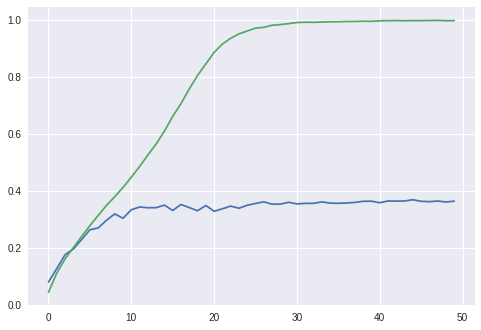

In [48]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])